In [1]:
# WandB – Install the W&B library
!pip install wandb -q
!pip install opencv-python

     |████████████████████████████████| 1.8 MB 5.3 MB/s 
     |████████████████████████████████| 97 kB 3.9 MB/s 
     |████████████████████████████████| 138 kB 30.1 MB/s 
     |████████████████████████████████| 133 kB 27.5 MB/s 
     |████████████████████████████████| 170 kB 29.6 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 62 kB 638 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import numpy as np
import pandas as pd 

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout, MaxPooling2D, Activation, Flatten 
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font = 'Serif', style = 'white', rc = {'axes.facecolor':'#f1f1f1', 'figure.facecolor':'#f1f1f1'})

import wandb
from wandb.keras import WandbCallback

import warnings
warnings.filterwarnings('ignore')

In [3]:
# login into wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

## Load The Data

In [4]:
from keras.datasets import fashion_mnist
# load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Show some photos

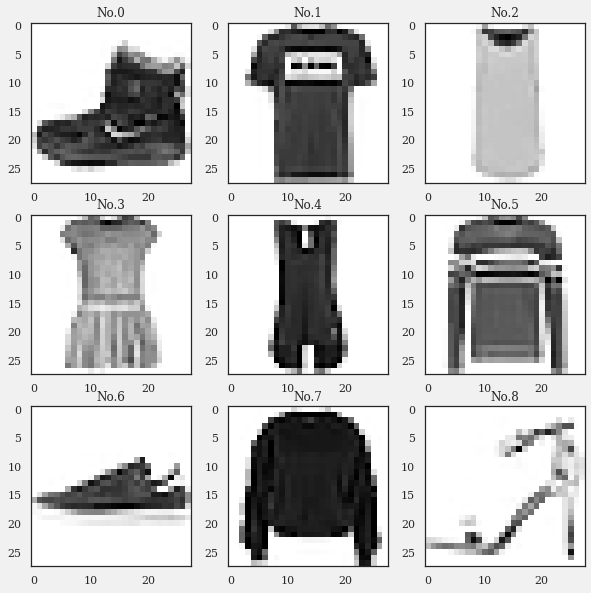

In [5]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.title("No." + str(i))
    plt.imshow(trainX[i].reshape(28,28), cmap='Greys')

Change train data and test data into float32 and divide by 255 That normalizes data from 1 to 0

In [6]:
trainX = trainX.astype('float32')/255
trainy = trainy.astype('float32')
testX = testX.astype('float32')/255
testy = testy.astype('float32')

Reshape train data and test data

In [7]:
trainX = trainX.reshape(-1,28,28,1)
testX = testX.reshape(-1,28,28,1)
#convert y_train into 10 categories
trainy = keras.utils.to_categorical(trainy, 10)
testy = keras.utils.to_categorical(testy, 10)

In [8]:
print('X_train.shape = {}, y_train.shape = {}'.format(trainX.shape, trainy.shape))
print('X_test.shape = {}, y_test.shape = {}'.format(testX.shape, testy.shape))

X_train.shape = (60000, 28, 28, 1), y_train.shape = (60000, 10)
X_test.shape = (10000, 28, 28, 1), y_test.shape = (10000, 10)


In [9]:
# Initilize a new wandb run
wandb.init(entity="naama_z", project="fashion_mnist_naama")

# 2. Save model inputs and hyperparameters
config = wandb.config
config.epochs = 20
config.batch_size = 128


wandb: Currently logged in as: naama_z (use `wandb login --relogin` to force relogin)


## Create 1st model

In [10]:
model = Sequential()
model.add(Conv2D(32,3, activation='relu',padding='same', input_shape=(28, 28,1)))
model.add(Conv2D(32,3,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 813,802
Trainable params: 813,802
Non-trainable params: 0
__________________________________________________

## Fit the Model

In [11]:
labels=["T-shirt or Top","Pants","Pullover","Dress","Coat","Sandal","Shirt","Shoes","Bag","Boot"]
result1 = model.fit(trainX, trainy,batch_size=config.batch_size, epochs=config.epochs,  validation_data=( testX, testy),
                    callbacks=[WandbCallback(data_type="image", labels=labels)])
wandb.run

Epoch 1/20
469/469 [==============================] - 134s 283ms/step - loss: 0.4244 - accuracy: 0.8516 - val_loss: 0.3171 - val_accuracy: 0.8854
Epoch 2/20
469/469 [==============================] - 132s 281ms/step - loss: 0.2656 - accuracy: 0.9050 - val_loss: 0.2702 - val_accuracy: 0.9012
Epoch 3/20
469/469 [==============================] - 133s 283ms/step - loss: 0.2156 - accuracy: 0.9216 - val_loss: 0.2571 - val_accuracy: 0.9088
Epoch 4/20
469/469 [==============================] - 132s 281ms/step - loss: 0.1831 - accuracy: 0.9322 - val_loss: 0.2324 - val_accuracy: 0.9170
Epoch 5/20
469/469 [==============================] - 133s 282ms/step - loss: 0.1554 - accuracy: 0.9430 - val_loss: 0.2342 - val_accuracy: 0.9212
Epoch 6/20
469/469 [==============================] - 134s 286ms/step - loss: 0.1314 - accuracy: 0.9514 - val_loss: 0.2397 - val_accuracy: 0.9196
Epoch 7/20
469/469 [==============================] - 134s 286ms/step - loss: 0.1074 - accuracy: 0.9613 - val_loss: 0.2394 -

## Create 2st model

In [12]:
#Build 2nd model.
model = Sequential()
model.add(Conv2D(32,3, activation='relu',padding='same', input_shape=(28, 28,1)))
model.add(Conv2D(32,3,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 813,802
Trainable params: 813,802
Non-trainable params: 0
________________________________________________

In [13]:
%%wandb
result2 = model.fit(trainX, trainy,batch_size=config.batch_size, epochs=config.epochs, validation_data=( testX, testy),
                    callbacks=[WandbCallback(data_type="image", labels=labels)])
#wandb.run

Epoch 1/20
469/469 [==============================] - 133s 283ms/step - loss: 0.4322 - accuracy: 0.8443 - val_loss: 0.3198 - val_accuracy: 0.8849
Epoch 2/20
469/469 [==============================] - 133s 283ms/step - loss: 0.2527 - accuracy: 0.9083 - val_loss: 0.2902 - val_accuracy: 0.8918
Epoch 3/20
469/469 [==============================] - 133s 284ms/step - loss: 0.2004 - accuracy: 0.9257 - val_loss: 0.2300 - val_accuracy: 0.9164
Epoch 4/20
469/469 [==============================] - 133s 283ms/step - loss: 0.1638 - accuracy: 0.9399 - val_loss: 0.2509 - val_accuracy: 0.9106
Epoch 5/20
469/469 [==============================] - 133s 284ms/step - loss: 0.1342 - accuracy: 0.9514 - val_loss: 0.2326 - val_accuracy: 0.9206
Epoch 6/20
469/469 [==============================] - 133s 282ms/step - loss: 0.1090 - accuracy: 0.9608 - val_loss: 0.2544 - val_accuracy: 0.9191
Epoch 7/20
469/469 [==============================] - 134s 285ms/step - loss: 0.0882 - accuracy: 0.9681 - val_loss: 0.2471 -

The models are pretty much the same

## Prediction

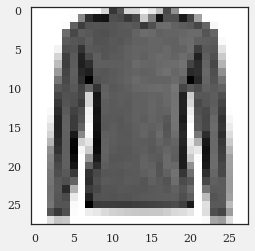

In [14]:
plt.imshow(testX[[55]].reshape(28,28),cmap='Greys')

In [15]:
#Let's predict.
prediction=model.predict(testX[[55]]) 
prediction

array([[1.2507705e-15, 1.5417471e-29, 9.9989045e-01, 8.6186955e-26,
        3.7826104e-16, 9.6189858e-28, 1.0948947e-04, 1.8725484e-32,
        1.4316717e-36, 1.0779157e-21]], dtype=float32)

In [16]:
#Preparation for this predction. 
list1=[]
[list1.append(i) for i in range(26)]
list2=[]
[list2.append(i) for i in labels]
dic = dict(zip(list1, list2))
#Let's check the result.
print("The answer is",dic[np.argmax(prediction)],"!")

The answer is Pullover !


In [17]:
#Let's predict whole test data! 
predictions = model.predict(testX)
results = np.argmax(predictions,axis=1)
results = pd.Series(results, name="Label")
results.tail()

9995    9
9996    1
9997    8
9998    1
9999    5
Name: Label, dtype: int64

#Save the model

In [18]:
model.save('model_fashion2')

INFO:tensorflow:Assets written to: model_fashion2/assets


In [19]:
model.save('model_fashion2.h5')